In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
visa_df=pd.read_csv(r"C:\Users\HP\Documents\Naresh It\Data files\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Box plot**

- Box plot is used for detect outliers.

- box plot has min q1 q2 q3 and max value.

- Inside box plot red line represents median which is 50 percentile data.

- **Outlier**

- very very huge observation

- very very small observation

- which pull the data in any side of the distribution

- Mild outliers

   - q1-1.5*IQR and q3+1.5*IQR
 
- Strong outliers

   - q1-3*IQR and q3+3*IQR
 
- IQR : Inter quartile range

   - IQR=Q3-Q1
- q1:25p

- q2:50p

- q3:75p

    Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

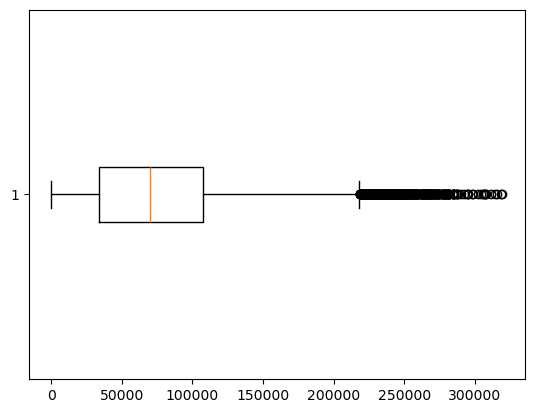

In [18]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

<Axes: >

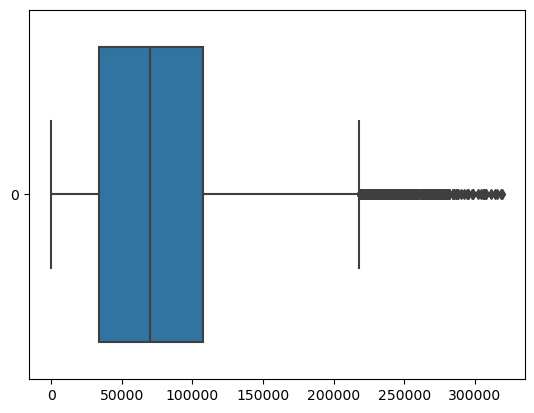

In [19]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')

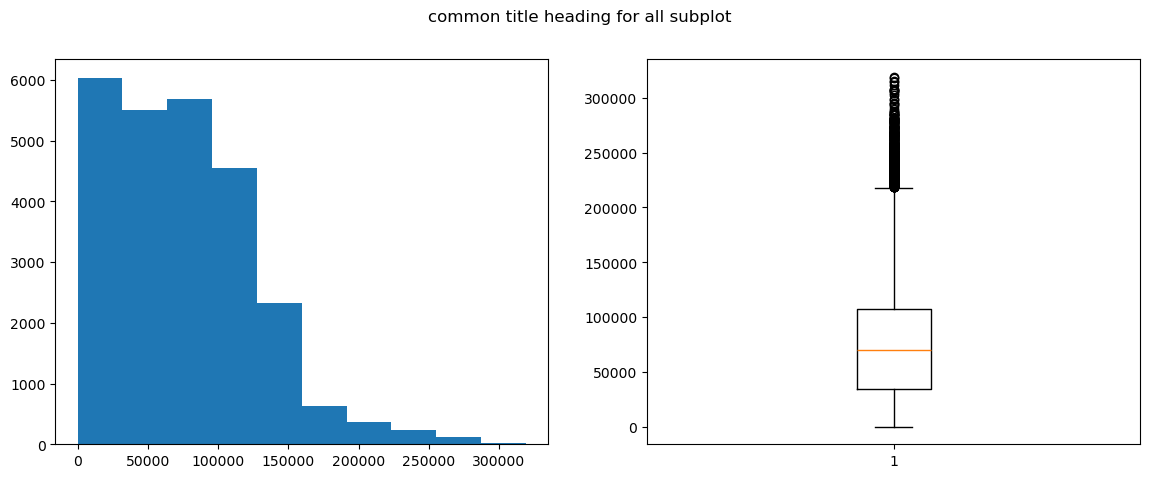

In [20]:
plt.figure(figsize=(14,5))
plt.suptitle('common title heading for all subplot')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the outliers**

- Outliers are available less than q1-1.5*IQR

- Outliers are available more than q3+1.5*IQR

- Step1:

   - calculate Q1:25p

   - calculate Q3:75p

   - Calculate IQR: Q3-Q1

- Step-2:

   - LB= Q1-1.5*IQR

   - UB= Q3+1.5*IQR

- Step-3:

  - con1=visa_df['prevailing_wage']<LB

  - con2=visa_df['prevailing_wage']>UB

  - apply OR operator and get the outliers data

**Outliers data**

In [22]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]

In [14]:
len(outliers_data)

427

**Non Outliers data**

In [15]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

**Histogram and boxplot for non outliers data**

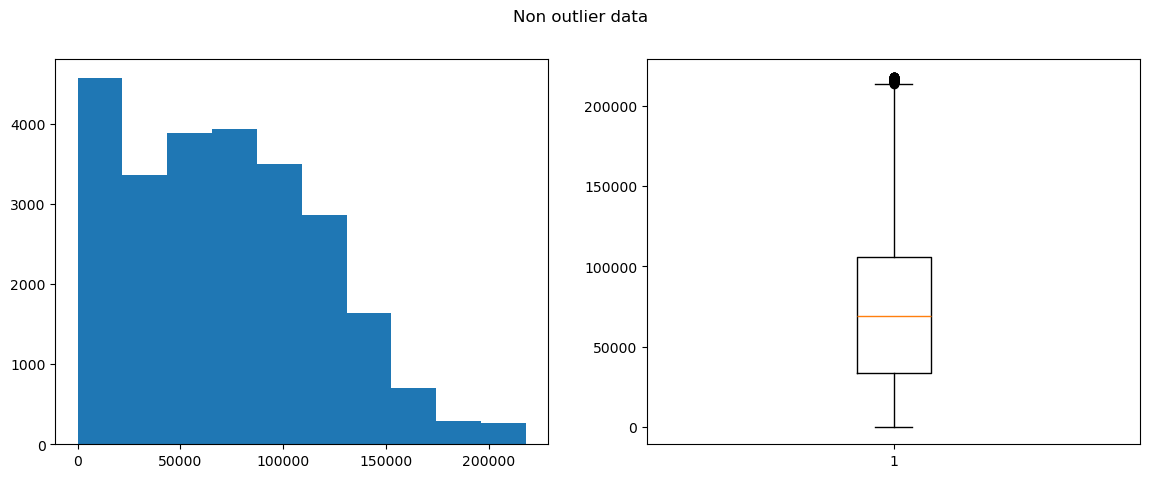

In [16]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outlier data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**Comparing total data with non outliers data**

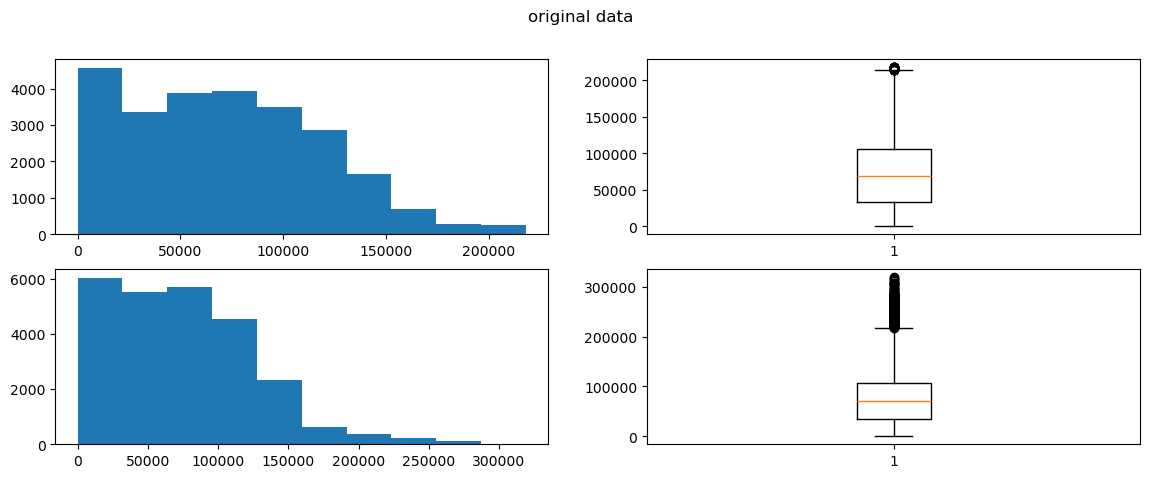

In [11]:
plt.figure(figsize=(14,5))        # 14 units in x axis and 5 units in y axis
plt.suptitle('Non outlier data vs original data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])     # 25053
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])   # 25053

plt.suptitle('original data')
plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])      # 25480
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])   # 25480
plt.show()

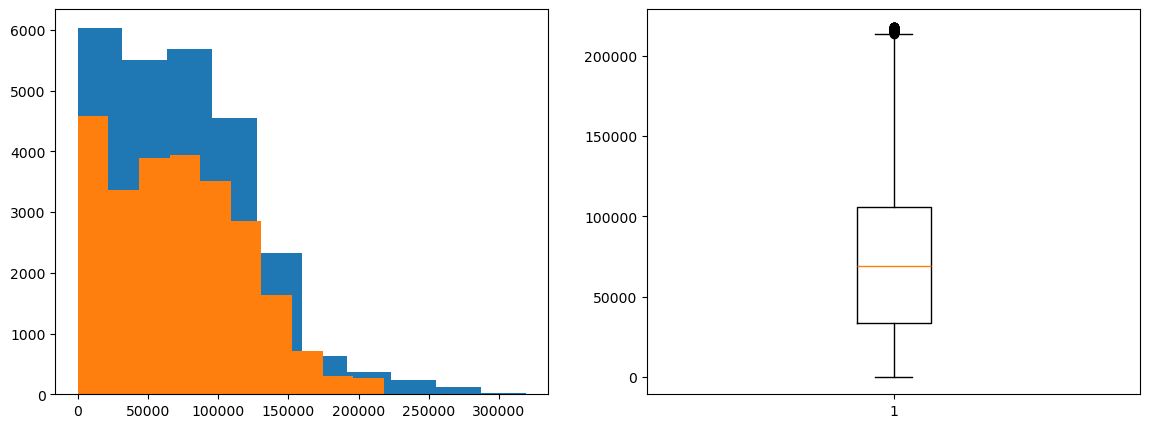

In [23]:
plt.figure(figsize=(14,5))        # 14 units in x axis and 5 units in y axis
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])  # 25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**How to deal the outliers**

- **Method-1: Drop the outliers**

   - Drop the outliers is not a good idea.

   - When you drop the outliers, data will loss

   - For example here we are droping 427 rows

   - x% of 25480=427

   - it is 1.7% data, here it is fine we can drop the outliers

- **Method-2: Fill with median value**

    - We already know that outliers does not affect the median

    - so we can fill outliers by median

- **Method-3: Cap the values with Q1 and Q2**

   - all lessthan lower bound values, we can replace with q1 or LB

   - all greater than upper bound values, we can replace with q3 or UB

**Fill with median**

- create an empty list

- calculate median value : visa_df['prevailing_wage'].median

- iterate the visa_df['prevailing_wage'].

- if each value i.e. i <lb or >ub then uppend with median values

- else append with i value

In [32]:
for i in visa_df['prevailing_wage'].values:

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

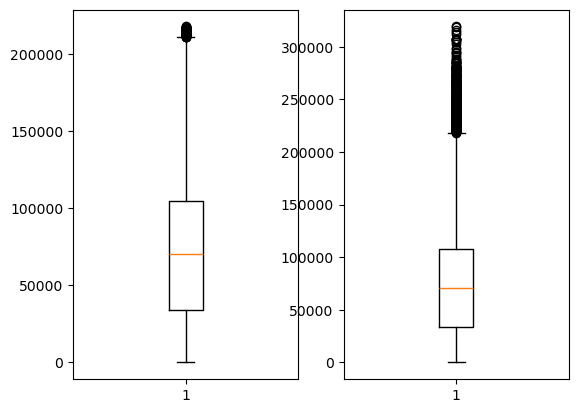

In [33]:
l1=[]
median=visa_df['prevailing_wage'].median()

Q1=np.percentile(visa_df['prevailing_wage'],25)
Q3=np.percentile(visa_df['prevailing_wage'],75)

IQR= Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

for value in visa_df['prevailing_wage'].values:
      if value < LB or value> UB:
           l1.append(median)
      else:
           l1.append(value)

visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=l1
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**np.where**

- np.where will use for binary condition 

- It has 3 arguments

   - condtion

   - value if condition is True

   - value if condition is False 

In [39]:
d={"sub":["DS","ML","CS"],"Marks":[150,100,20]}
data=pd.DataFrame(d)

# marks column replace with 1 when value >100
# else same value
# Marks     #Marks
# 150        1
# 100        100
# 20         20

In [40]:
con=data['Marks']>100
l=np.where(con,1,data['Marks'])
# if condition True then replace with 1
# if condition False then replace with : data['Marks']
l

array([  1, 100,  20], dtype=int64)

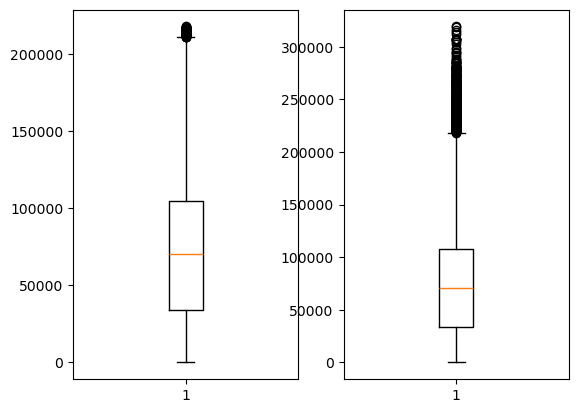

In [42]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
con=con1 | con2
median=visa_df['prevailing_wage'].median()
new_data=np.where(con,median,visa_df['prevailing_wage'])
visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=new_data
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()